In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\Downloads\\Spreadsheets-20231017T124722Z-001\\Spreadsheets\\NEDL_ILPM_Portfolio.xlsx',index_col='Date')[['Large stocks','Small stocks','Treasury bonds','Corporate bonds','Gold','REIT']]
df

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Date,,,,,,
2016-03-30,187.404327,103.284630,115.934731,63.101669,117.099998,67.771255
2016-03-31,186.949509,103.563309,116.757210,63.186726,117.639999,68.186249
2016-04-01,188.222961,103.804810,117.061729,63.232586,116.930000,68.096741
2016-04-04,187.613495,103.024544,117.133392,63.077179,116.150002,67.999100
2016-04-05,185.739670,101.835556,118.414383,62.844059,117.660004,67.551575
...,...,...,...,...,...,...
2021-03-23,389.500000,209.498306,137.490005,86.459999,161.809998,90.471031
2021-03-24,387.519989,206.307007,138.229996,86.510002,162.369995,89.963997
2021-03-25,389.700012,210.350006,137.139999,86.660004,161.779999,90.879997


In [3]:
returns=df.pct_change()
returns

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Date,,,,,,
2016-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31,-0.002427,0.002698,0.007094,0.001348,0.004611,0.006123
2016-04-01,0.006812,0.002332,0.002608,0.000726,-0.006035,-0.001313
2016-04-04,-0.003238,-0.007517,0.000612,-0.002458,-0.006671,-0.001434
2016-04-05,-0.009988,-0.011541,0.010936,-0.003696,0.013000,-0.006581
...,...,...,...,...,...,...
2021-03-23,-0.007871,-0.028578,0.009027,0.001042,-0.007301,-0.001427
2021-03-24,-0.005083,-0.015233,0.005382,0.000578,0.003461,-0.005604
2021-03-25,0.005626,0.019597,-0.007885,0.001734,-0.003634,0.010182


In [4]:
Annual_target=0.10
daily_target=(1+Annual_target)**(1/252)-1
moment_order_m=100

In [5]:
LPM=pd.DataFrame(columns=[['Large stocks','Small stocks','Treasury bonds','Corporate bonds','Gold','REIT']],index=['LPM','ILPM Portfolio'])
LPM

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
LPM,NaN,NaN,NaN,NaN,NaN,NaN
ILPM Portfolio,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
LPM.loc['LPM','Large stocks']=((abs(returns[(returns['Large stocks']-daily_target)<0]['Large stocks'])).mean()**moment_order_m)
LPM.loc['LPM','Small stocks']=((abs(returns[(returns['Small stocks']-daily_target)<0]['Small stocks'])).mean()**moment_order_m)
LPM.loc['LPM','Treasury bonds']=((abs(returns[(returns['Treasury bonds']-daily_target)<0]['Treasury bonds'])).mean()**moment_order_m)
LPM.loc['LPM','Corporate bonds']=((abs(returns[(returns['Corporate bonds']-daily_target)<0]['Corporate bonds'])).mean()**moment_order_m)
LPM.loc['LPM','Gold']=((abs(returns[(returns['Gold']-daily_target)<0]['Gold'])).mean()**moment_order_m)
LPM.loc['LPM','REIT']=((abs(returns[(returns['REIT']-daily_target)<0]['REIT'])).mean()**moment_order_m)
LPM

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
LPM,0.0,0.0,0.0,0.0,0.0,0.0
ILPM Portfolio,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
LPM.loc['LPM'].values

array([1.6186663737835495e-217, 6.633151154789079e-207,
       5.543940342730214e-223, 8.750619651064161e-256,
       3.7245810055207393e-222, 3.856716697239242e-206], dtype=object)

In [8]:
Sum_of_ILPM=(1/LPM.loc['LPM'].values).sum()
Sum_of_ILPM

1.1427762145717192e+255

In [9]:
LPM.loc['ILPM Portfolio','Large stocks']=(1/LPM.loc['LPM','Large stocks'][0])/Sum_of_ILPM
LPM.loc['ILPM Portfolio','Small stocks']=(1/LPM.loc['LPM','Small stocks'][0])/Sum_of_ILPM
LPM.loc['ILPM Portfolio','Treasury bonds']=(1/LPM.loc['LPM','Treasury bonds'][0])/Sum_of_ILPM
LPM.loc['ILPM Portfolio','Corporate bonds']=(1/LPM.loc['LPM','Corporate bonds'][0])/Sum_of_ILPM
LPM.loc['ILPM Portfolio','Gold']=(1/LPM.loc['LPM','Gold'][0])/Sum_of_ILPM
LPM.loc['ILPM Portfolio','REIT']=(1/LPM.loc['LPM','REIT'][0])/Sum_of_ILPM

In [10]:
LPM

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
LPM,0.0,0.0,0.0,0.0,0.0,0.0
ILPM Portfolio,0.0,0.0,0.0,1.0,0.0,0.0


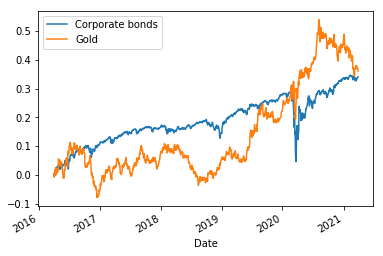

In [11]:
returns.cumsum()[['Corporate bonds','Gold']].plot()

In [12]:
returns.std()

Large stocks       0.011811
Small stocks       0.013865
Treasury bonds     0.008760
Corporate bonds    0.005694
Gold               0.008642
REIT               0.014136
dtype: float64

In [13]:
#when moment_order_m is close to 0 means the investor is less risk averse and want equally weighted portfolio
#when moment_order_m is close to 100 means the investor is  risk averse and want play safer